# ENUNCIADO

Somos trabajadores españoles que nos estamos planteando ir a trabajar a otro país. El coste de la vida en el otro país al que estamos pensando en ir es más alto que en España, por lo que para que nos salga rentable deberíamos cobrar más de 50 000 euros en el país de destino. Para saber si nos sale rentable irnos o no, queremos realizar un modelo de clasificación para saber si cobraríamos más de 50 000 euros o menos en el país de destino. 

Hemos localizado un dataset para realizar un modelo de clasificación con el que posteriormente averiguar si cobraríamos más de 50 000 euros o no.

# PLAN DE TRABAJO

* Lectura de datos y análisis inicial. En este apartado se obtendrán el número de filas, el número de columnas y los nombres de las variables independientes.

Preprocesamiento de datos:
* Comprobar la existencia de missings, y en caso de haberlos, rellenarlos con un valor.
* Pasar las variables categóricas a numéricas. Una forma es mapeándolas a valores numéricos o a dummies.
* División de los datos en dos conjuntos: X, solo contiene las features, e Y, contiene la target.

Visualizaciones y correlaciones:
* Describir los datos con el método Describe().
* Representar la dispersión de las variables con boxplots.
* Representar las distribuciones con los histogramas.
* Representar la relación de las features con la target.
* Estandarización de datos.
* División del dataset en dos conjuntos (train + test).
* Aplicación de un modelo de regresión logística, optimizando el parámetro de tolerancia C. 
* Obtención de la curva ROC con el mejor parámetro C obtenido.
* Umbralizar las predicciones y obtener la matriz de confusión, el accuracy, la sensitividad y la precisión.

# INFORMACIÓN DE LOS DATOS

Cuenta con un total de 14 variables predictoras X y una variable continua que predecir Y.

El número total de muestras es de 32 561 personas.

Información de las variables:

Variable dependiente Y: 
* TARGET: >50K, <=50K.

Variables independientes X:
* Age: continuous.
* Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* Education-num: continuous.
* Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* Sex: Female, Male.
* Capital-gain: continuous.
* Capital-loss: continuous.
* Hours-per-week: continuous.
* Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc.), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
# Carga de librerias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/var/folders/pr/98xsblmx0js081jf_gv6xm5m0000gn/T/ipykernel_45876/3065445915.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Lectura de datos

In [3]:
# Defino la lista de nombres de las variables
nombres_columnas = ['edad', 'clase_trabajo', 'fnlwgt', 'educacion',
                   'educacion_num', 'estado_civil', 'ocupacion',
                    'relaciones', 'raza', 'sexo', 'ganancia_capital',
                    'perdida_capital', 'horas_por_semana', 'pais_nacimiento', 'target']
# Lectura de datos
data = pd.read_csv('./adult.data', sep=', ', names=nombres_columnas, index_col=False)
data.head()

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
print(u'- El número de filas en el dataset es: {}'.format(data.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(data.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(data.columns)))

- El número de filas en el dataset es: 32561
- El número de columnas en el dataset es: 15
- Los nombres de las variables son: ['edad', 'clase_trabajo', 'fnlwgt', 'educacion', 'educacion_num', 'estado_civil', 'ocupacion', 'relaciones', 'raza', 'sexo', 'ganancia_capital', 'perdida_capital', 'horas_por_semana', 'pais_nacimiento', 'target']


# Preprocesamiento de los datos

### Valores faltantes

In [6]:
data.isnull().sum()

edad                0
clase_trabajo       0
fnlwgt              0
educacion           0
educacion_num       0
estado_civil        0
ocupacion           0
relaciones          0
raza                0
sexo                0
ganancia_capital    0
perdida_capital     0
horas_por_semana    0
pais_nacimiento     0
target              0
dtype: int64

### Categóricas a numéricas

Es necesario convertir las variables categóricas a numéricas de cara a introducirlas en los modelos. 

In [7]:
# Lista de variables categóricas
data.select_dtypes(exclude=['number']).columns

Index(['clase_trabajo', 'educacion', 'estado_civil', 'ocupacion', 'relaciones',
       'raza', 'sexo', 'pais_nacimiento', 'target'],
      dtype='object')

In [8]:
# Utilizamos el método de Label Encoder
le = LabelEncoder()

#### clase_trabajo

In [9]:
data['clase_trabajo'].value_counts()

clase_trabajo
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Las muestras que sean distintas de Private los codifico como 0s, los Private como 1s.

In [18]:
data.loc[data['clase_trabajo'] != 'Private', 'clase_trabajo'] = 0
data.loc[data['clase_trabajo'] == 'Private', 'clase_trabajo'] = 1
data['clase_trabajo'] = data['clase_trabajo'].astype(int)

#### educacion

In [19]:
data['educacion'].value_counts()

educacion
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [27]:
dic = {'Doctorate':0, 'Masters':1, 'Bachelors': 2, 'Some-college':3, 'Assoc-voc':4,
       'Assoc-acdm': 5, 'HS-grad': 6, 'Prof-school': 7, 'Preschool': 8,
       '12th': 9, '11th': 10, '10th': 11, '9th': 12, '7th-8th': 13,
       '5th-6th': 14, '1st-4th':15}
data["educacion"].replace(dic, inplace=True)

#### estado_civil

In [28]:
data['estado_civil'].value_counts()

estado_civil
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [35]:
# Codificamos con label encoder
data['estado_civil'] = le.fit_transform(data.estado_civil.values)

#### ocupacion

In [36]:
data['ocupacion'].value_counts()

ocupacion
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [42]:
# Codificamos con label encoder
data['ocupacion'] = le.fit_transform(data.ocupacion.values)

#### relaciones

In [43]:
data['relaciones'].value_counts()

relaciones
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [44]:
# Codificamos con label encoder
data['relaciones'] = le.fit_transform(data.relaciones.values)

#### raza

In [45]:
data['raza'].value_counts()

raza
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [49]:
data.loc[data['raza'] != 'White', 'raza'] = 0
data.loc[data['raza'] == 'White', 'raza'] = 1
data['raza'] = data['raza'].astype(int)

#### sexo

In [50]:
data['sexo'].value_counts()

sexo
Male      21790
Female    10771
Name: count, dtype: int64

In [51]:
data.loc[data['sexo'] == 'Male', 'sexo'] = 0
data.loc[data['sexo'] == 'Female', 'sexo'] = 1
data['sexo'] = data['sexo'].astype(int)

#### pais_nacimiento

In [52]:
data['pais_nacimiento'].value_counts()

pais_nacimiento
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France      

In [54]:
data.loc[data['pais_nacimiento'] != 'United-States', 'pais_nacimiento'] = 0
data.loc[data['pais_nacimiento'] == 'United-States', 'pais_nacimiento'] = 1
data['pais_nacimiento'] = data['pais_nacimiento'].astype(int)

#### target

In [55]:
data['target'].value_counts()

target
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [56]:
dic = {'<=50K': 0, '>50K': 1}
data.target.replace(dic, inplace=True)

In [57]:
# Comprobamos que no hay variables categóricas
data.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

### División de los datos

In [58]:
X = data.drop('target', axis=1)
Y = data.target

# Visualizaciones y Correlaciones

### Descriptores básicos

In [59]:
data.describe()

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento,target
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,0.697030,1.897784e+05,4.922238,10.080679,2.611836,6.572740,1.446362,0.854274,0.330795,1077.648844,87.303830,40.437456,0.895857,0.240810
std,13.640433,0.459549,1.055500e+05,3.085071,2.572720,1.506222,4.228857,1.606771,0.352837,0.470506,7385.292085,402.960219,12.347429,0.305451,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.178270e+05,3.000000,9.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,1.783560e+05,5.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,1.000000,2.370510e+05,6.000000,12.000000,4.000000,10.000000,3.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


### Boxplots

In [60]:
# Normalizamos nuestras variables:
X_normalizado = (X-X.mean())/X.std()
X_normalizado.head()

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento
0,0.030670,-1.516769,-1.063594,-0.947219,1.134721,0.921620,-1.317789,-0.277801,0.413013,-0.703061,0.148451,-0.216656,-0.035429,0.340949
1,0.837096,-1.516769,-1.008692,-0.947219,1.134721,-0.406206,-0.608377,-0.900167,0.413013,-0.703061,-0.145918,-0.216656,-2.222119,0.340949
2,-0.042641,0.659276,0.245075,0.349347,-0.420053,-1.734032,-0.135436,-0.277801,0.413013,-0.703061,-0.145918,-0.216656,-0.035429,0.340949
3,1.057031,0.659276,0.425795,1.645914,-1.197440,-0.406206,-0.135436,-0.900167,-2.421155,-0.703061,-0.145918,-0.216656,-0.035429,0.340949
4,-0.775756,0.659276,1.408154,-0.947219,1.134721,-0.406206,0.810446,2.211664,-2.421155,1.422309,-0.145918,-0.216656,-0.035429,-2.932903


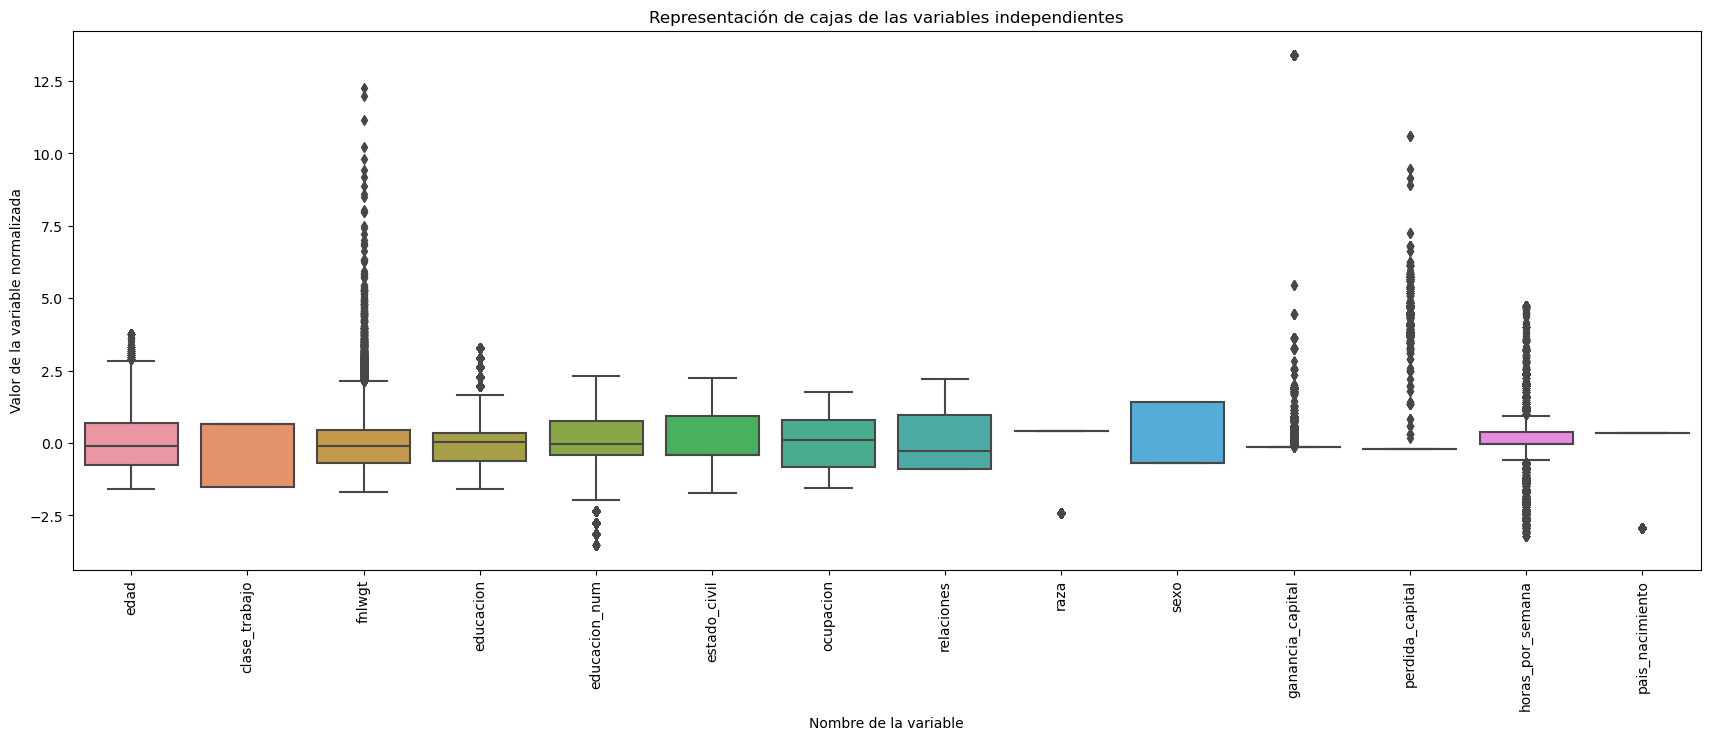

In [62]:
plt.figure(figsize=(21,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
plt.title(u'Representación de cajas de las variables independientes')
plt.ylabel(u'Valor de la variable normalizada')
_ = plt.xlabel(u'Nombre de la variable')

### Histogramas

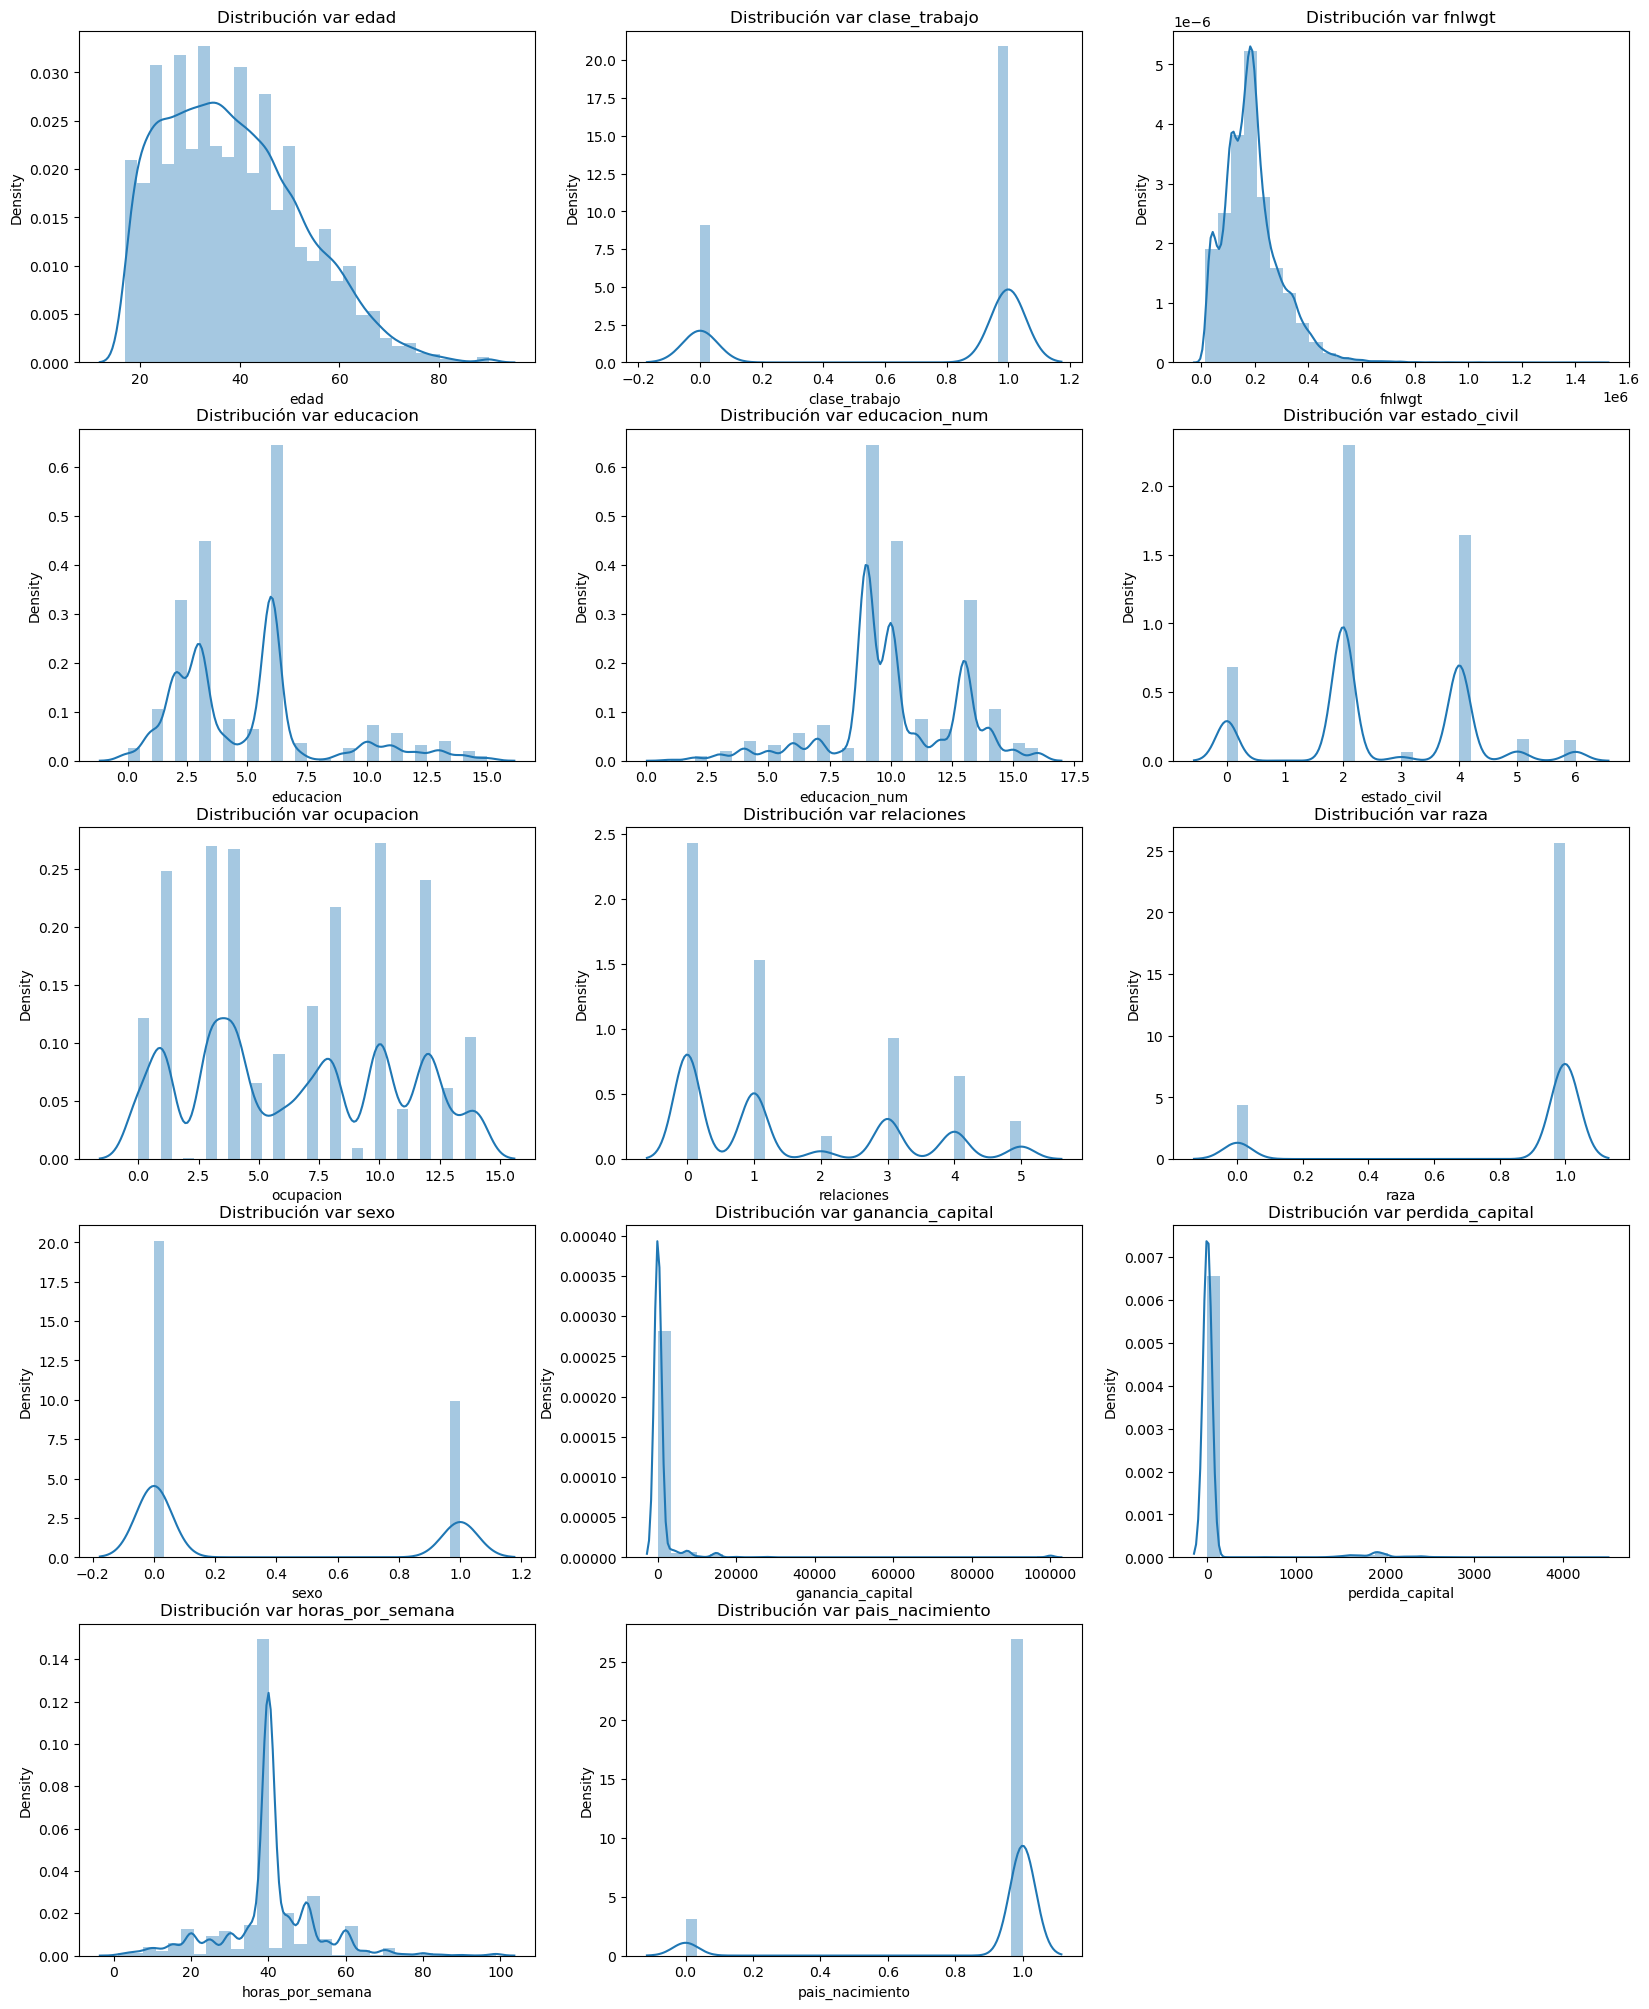

In [75]:
plt.figure(figsize=(20,25))
n = 0
for i, column in enumerate(X.columns):
    n += 1
    plt.subplot(5, 3, n)
    sns.distplot(X[column], bins = 30)
    plt.title('Distribución var {}'.format(column))
plt.show()


### Relación variable vs. target

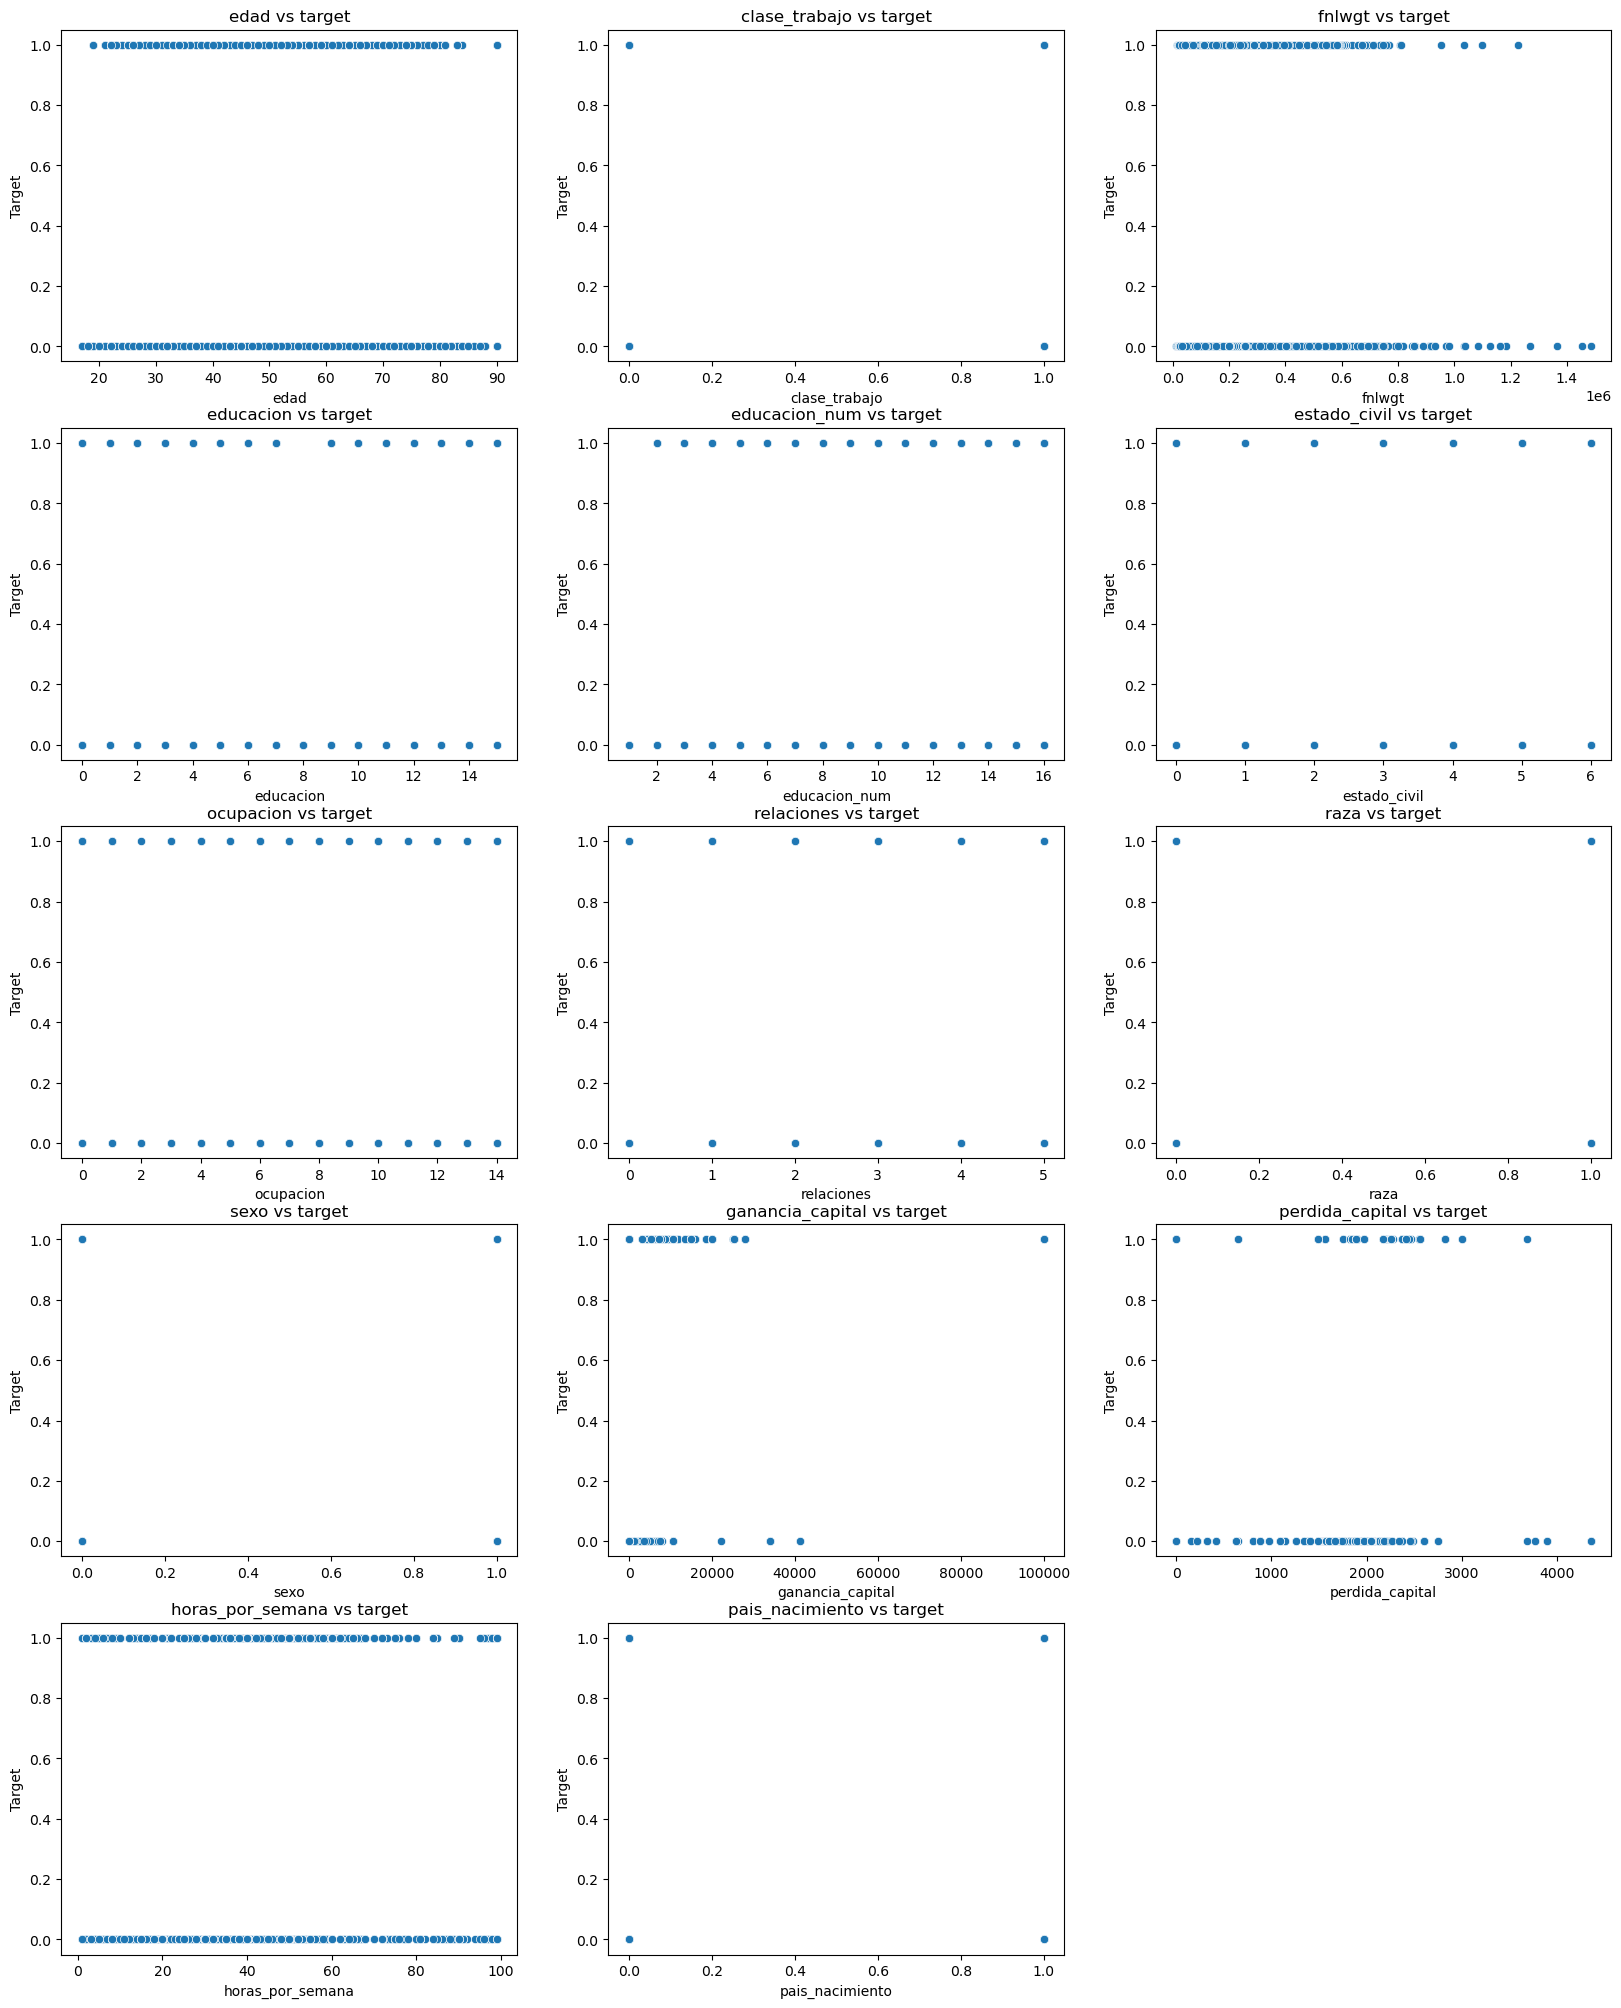

In [77]:
plt.figure(figsize=(20,25))
n = 0
for i, columns in enumerate(X.columns):
    n += 1
    plt.subplot(5, 3, n)
    sns.scatterplot(x = X[columns], y = Y)
    plt.title('%s vs %s' % (columns, 'target'))
    plt.ylabel('Target')
    plt.xlabel(columns)
plt.show()

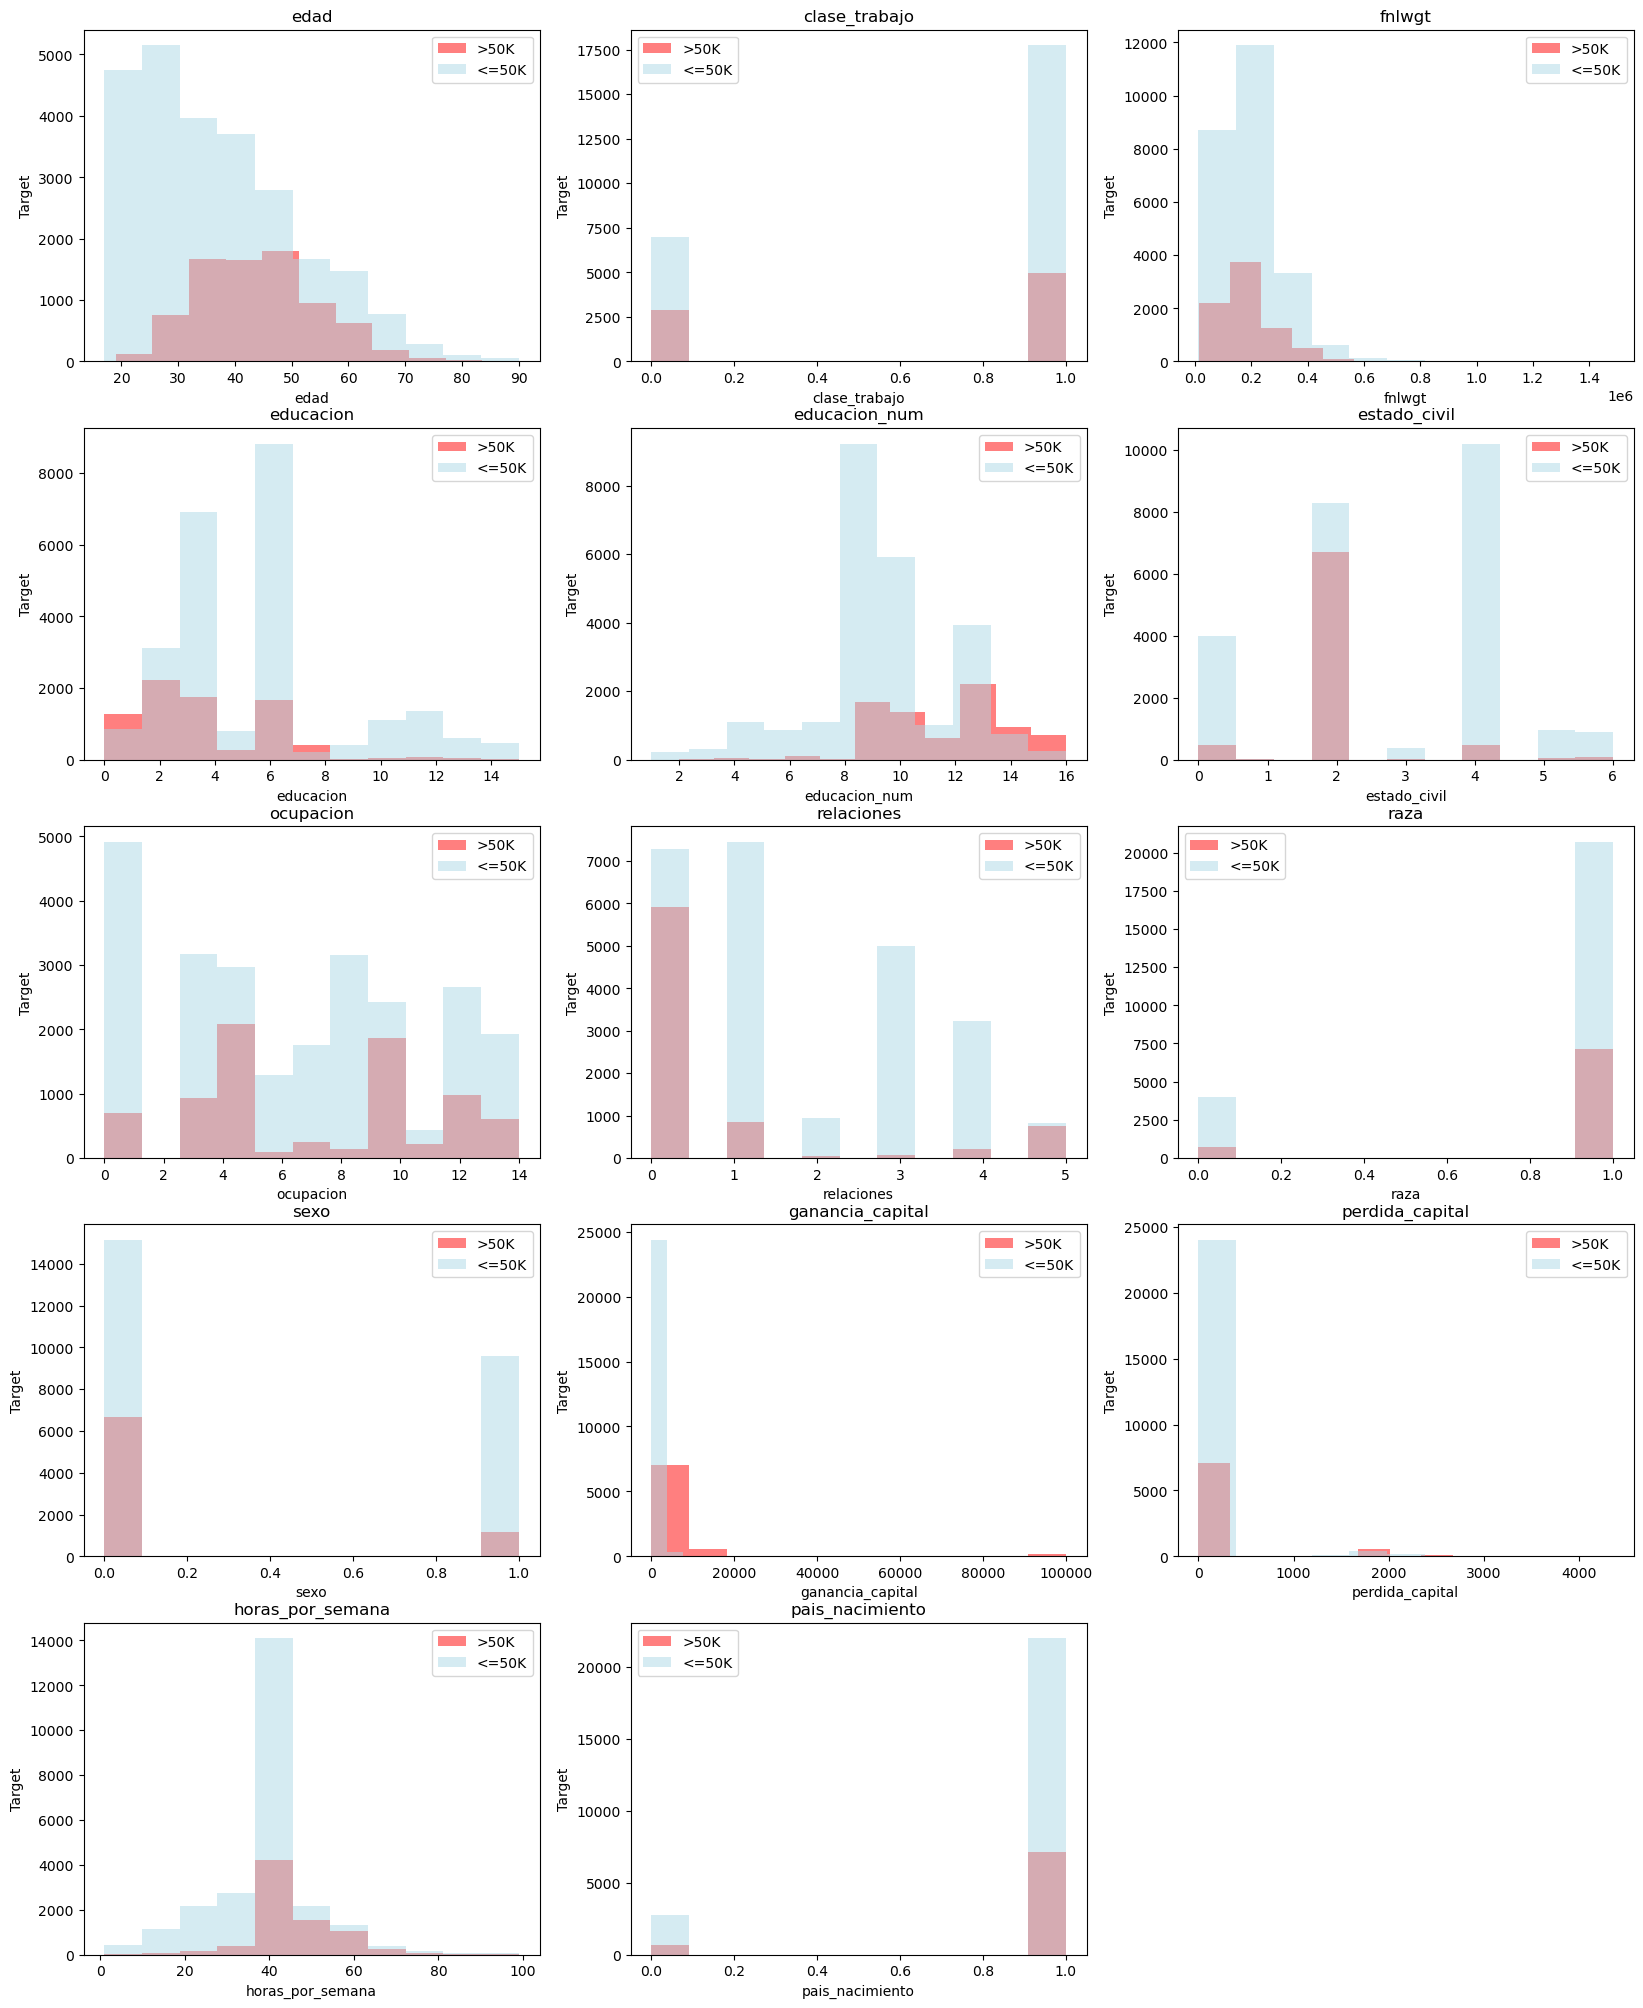

In [85]:
plt.figure(figsize=(20,25))
n = 0
bins = 11
targets=(1, 0)
target_pos, target_neg = targets
for i, columns in enumerate(X.columns):
    n += 1
    plt.subplot(5, 3, n)
    idx_pos = Y == target_pos
    idx_neg = Y == target_neg
    plt.hist(X[columns][idx_pos].values, bins, density = 0, alpha = 0.5, label = '>50K', color = 'red')
    plt.hist(X[columns][idx_neg].values, bins, density = 0, alpha = 0.5, label = '<=50K', color = 'lightblue')
    plt.title('%s' % columns)
    plt.legend(loc = 'best')
    plt.ylabel('Target')
    plt.xlabel(columns)
plt.show()

Estos gráficos son interesantes para analizar el poder predictivo de las variables. Cuanto más se separen las dos distribuciones, mejor para predecir ya que es más fácil discriminarlas.

### Matriz de correlaciones

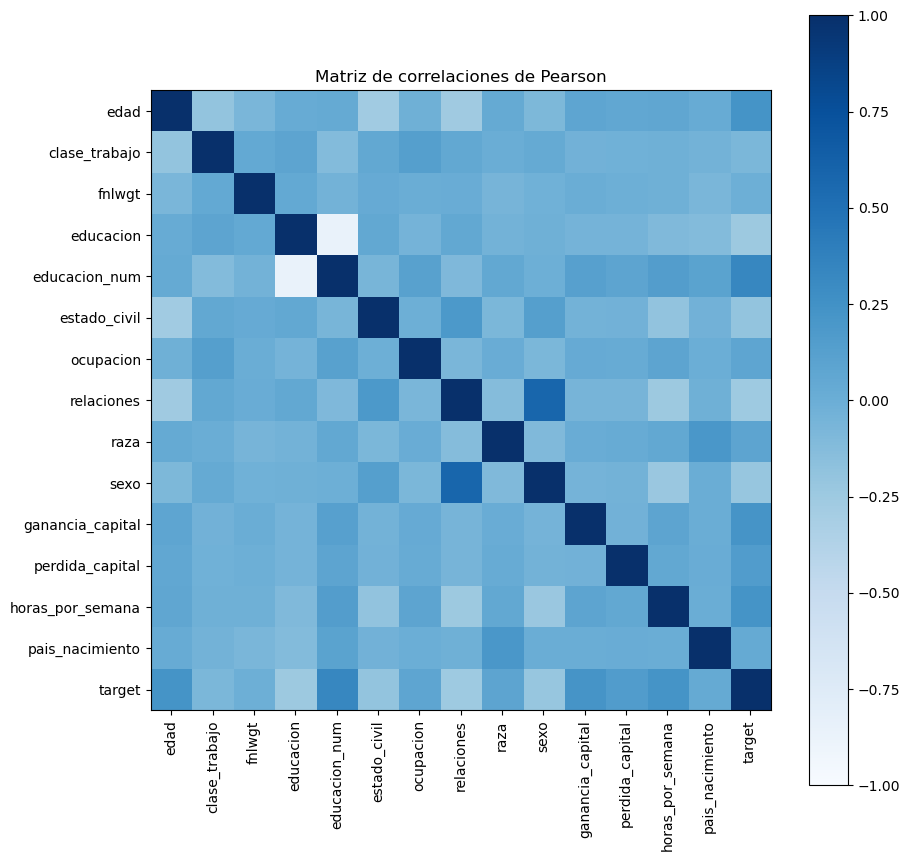

In [87]:
matriz_correlaciones = data.corr(method='pearson')
n_ticks = len(data.columns)
plt.figure(figsize=(10, 10))
plt.xticks(range(n_ticks), data.columns, rotation = 'vertical')
plt.yticks(range(n_ticks), data.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', vmin=-1., vmax=1., cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')
plt.show()

### Variables con mayor correlación con target

In [88]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
educacion_num,0.335154
relaciones,-0.250918
educacion,-0.244846
edad,0.234037
horas_por_semana,0.229689
ganancia_capital,0.223329
sexo,-0.215980
estado_civil,-0.199307
perdida_capital,0.150526
raza,0.085224


### Estandarización de datos

In [89]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

### División de datos en train y test

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Modelaje

### Aplicación de un modelo de regresión logística

In [92]:
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], "class_weight":['balanced', None]}

Con GridSearchCV se realiza una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros. En este caso, todas las combinaciones de C y class_weights.

In [93]:
modelo_GS = GridSearchCV(modelo, param_grid = parametros, cv = 5, scoring = 'roc_auc')
modelo_GS.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [94]:
print(modelo_GS.best_params_, "\nROC AUC: {}".format(round(modelo_GS.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.86


In [95]:
df_search = pd.DataFrame.from_dict(modelo_GS.cv_results_)

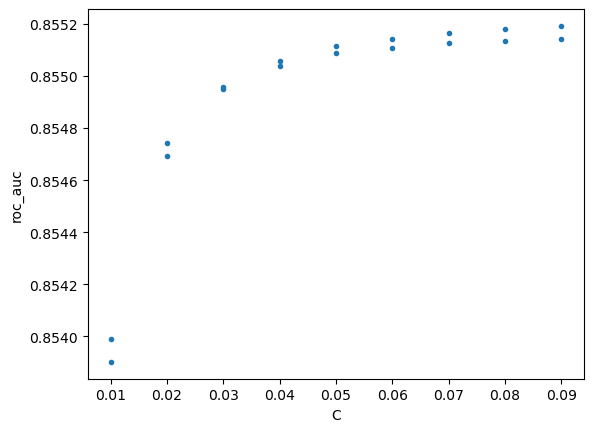

In [96]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

In [98]:
# Nos quedamos con los mejores parámetros obtenidos:
reg_log = LogisticRegression(C = modelo_GS.best_params_['C'], class_weight=modelo_GS.best_params_['class_weight'])
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

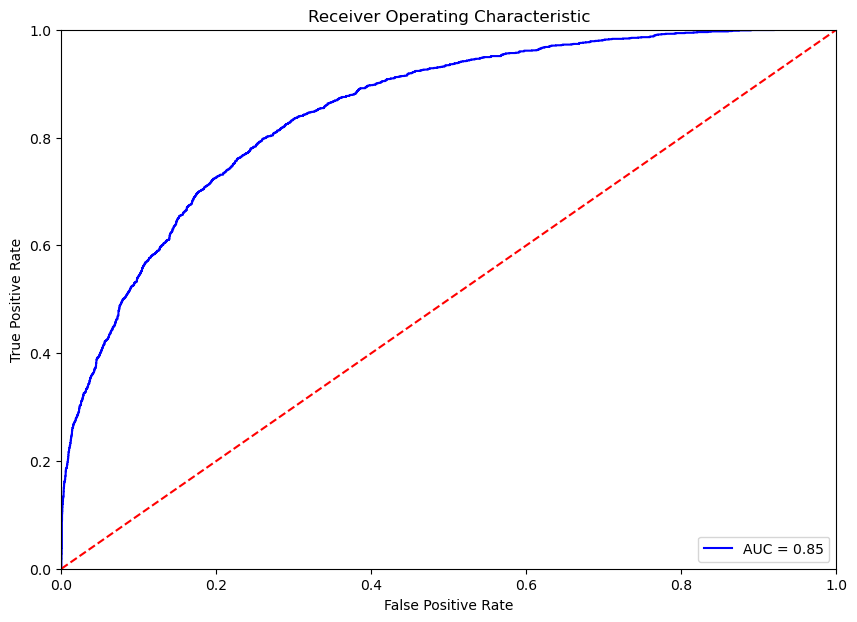

In [99]:
# Validamos el modelo ya elegido y optimizado:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

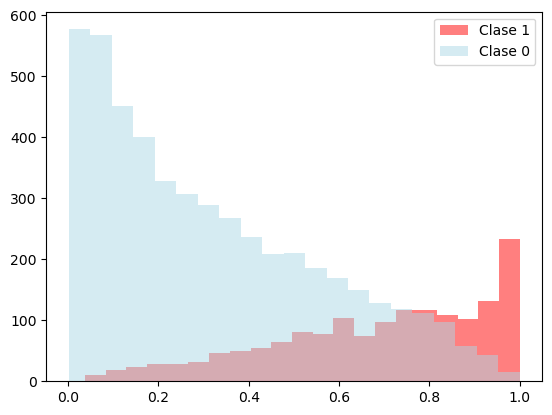

In [103]:
bins = 21
plt.hist(y_test_pred_prob_pos[:, 1], bins, density = 0, alpha=0.5, label='Clase 1', color='red')    
plt.hist(y_test_pred_prob_neg[:, 1], bins, density = 0, alpha=0.5, label='Clase 0', color='lightblue')
plt.legend(loc='best') 

Esta figura representa en verde las probabilidades que asigna el modelo a los datos que son 0s (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1s (cuanto más cerca esté de 1 la distribución roja mejor). Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1. Para pasarlo a 0s y a 1s es necesario usar un umbral de corte. Todo lo que sea mayor que el umbral será predicción = 1, y lo que sea menor será predicción = 0.

In [104]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))  

Matriz de confusión
 [[4132  786]
 [ 537 1058]]

Accuracy	0.8
Sensitividad	0.66
Precisión	0.57


#### Matriz de Confusión:
* Verdaderos Positivos (VP): 4132 personas que realmente ganarían más de 50 000 euros en el país de destino.
* Falsos Positivos (FP): 786 personas que el modelo predijo que ganarían más de 50 000 euros, pero en realidad no lo harían.
* Verdaderos Negativos (VN): 1058 personas que realmente ganarían menos de 50 000 euros en el país de destino.
* Falsos Negativos (FN): 537 personas que el modelo predijo que ganarían menos de 50 000 euros, pero en realidad ganarían más.

#### Accuracy (Exactitud): 
Este es el porcentaje de predicciones correctas en general. En este caso, el modelo tiene una exactitud del 80%, lo que significa que el 80% de las veces, predice correctamente si una persona ganaría más de 50 000 euros o no en el país de destino.

#### Sensitividad (Recall): 
También conocido como tasa de verdaderos positivos o cobertura. Es la proporción de casos positivos que fueron correctamente identificados por el modelo. Aquí, la sensibilidad es del 66%, lo que indica que el modelo identifica correctamente al 66% de las personas que realmente ganarían más de 50 000 euros.

#### Precisión: 
Es la proporción de verdaderos positivos sobre el total de predicciones positivas hechas por el modelo. En este caso, la precisión es del 57%, lo que significa que el 57% de las veces que el modelo predice que alguien ganaría más de 50 000 euros, es correcto.

En resumen, aunque el modelo tiene una buena exactitud general del 80%, su precisión y sensibilidad podrían mejorarse. Esto significa que hay margen para refinar el modelo para hacer predicciones más precisas y útiles para tomar decisiones sobre la viabilidad económica de trasladarse al país de destino.